In [441]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline

In [442]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(),".."))
sys.path.append(os.path.join(os.getcwd(),"..","code"))

In [443]:
import filters
import likelihood_functions as lk
import PoissonProcessClasses as PP
import auxiliary_functions as auxfun

In [444]:
# Reloading modules which are in development
import imp
imp.reload(filters)
imp.reload(auxfun)
imp.reload(lk)
imp.reload(PP)

<module 'PoissonProcessClasses' from '/Users/val/MEGAsync/GLM_PythonModules/notebooks/../code/PoissonProcessClasses.py'>

In [445]:
dt = 0.01

In [446]:
# create a stimulus filter
kpeaks = np.array([0,round(20/3)])
pars_k = {'neye':5,'n':5,'kpeaks':kpeaks,'b':3}
K,K_orth,kt_domain = filters.createStimulusBasis(pars_k, nkt = 20) 

In [447]:
# create a post-spike filter
hpeaks = np.array([0.1,2])
pars_h = {'n':5,'hpeaks':hpeaks,'b':.4,'absref':0.}
H,H_orth,ht_domain = filters.createPostSpikeBasis(pars_h,dt)

In [448]:
# preserve the true bases
K_true = K
H_true = H

In [449]:
Stim = np.round(sp.rand(2500)*4-2);

In [450]:
M_k = lk.construct_M_k(Stim,K,dt)

In [451]:
M = np.hstack((M_k,np.ones((M_k.shape[0],1))))

In [452]:
coeff_k = np.array([ 0.061453,0.284916,0.860335,1.256983,0.910615,0.488660,-0.887091,0.097441,0.026607,-0.090147])
coeff_h = np.array([-10, -5, 0, 2, -2])

In [453]:
N = 1
a = np.hstack(tuple([coeff_h]*N))

In [454]:
coeff_h_list = [coeff_h]*N
coeff_list = [np.hstack((coeff_k,3,a))]*N

In [455]:
tsp_sim = auxfun.simSpikesMultiple(coeff_list,M,H,ht_domain,dt = 0.01)

spike198
spike297
spike699
spike861
spike1001
spike2088
spike2349
spike2985
spike3043
spike3115
spike3195
spike3276
spike4652
spike4829
spike4991
spike5082
spike5693
spike5981
spike6078
spike6651
spike6801
spike6912
spike6981
spike7078
spike7642
spike7862
spike7960
spike8068
spike8764
spike9378
spike9624
spike9728
spike9809
spike10099
spike10176
spike10699
spike10947
spike11031
spike11555
spike12054
spike12134
spike12218
spike12757
spike12861
spike13379
spike13418
spike13490
spike13572
spike13681
spike14101
spike14195
spike14721
spike14867
spike14965
spike15499
spike15621
spike16144
spike16564
spike16637
spike16699
spike16765
spike17173
spike17249
spike17761
spike17915
spike18014
spike18507
spike18798
spike19327
spike19623
spike19691
spike19767
spike20683
spike21233
spike21481
spike21862
spike21929
spike23283
spike23566
spike23651
spike23724
spike24241
spike24437
spike24522
spike24605
spike25111
spike25291
spike25374
spike25889
spike26032
spike26450
spike26526
spike26599
spike26721
spi

In [461]:
import matplotlib.cm as cm
colors = cm.hot(np.linspace(0,1,len(tsp_sim)))

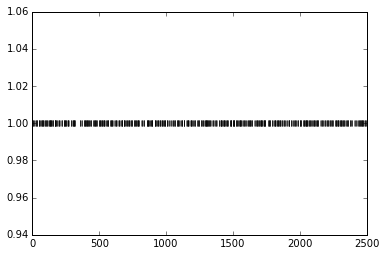

In [462]:
plt.hold(True)
for i in range(len(tsp_sim)):
    plt.plot(tsp_sim[i],[(i+1)]*len(tsp_sim[i]),'k|')

In [463]:
# need to create a function to convert tsps to spike trains

In [464]:
dt = 0.01
y_list = []
for tsp in tsp_sim:
    tsp = np.array(tsp).astype(np.float)
    tsp_int = np.ceil((tsp - dt*0.001)/dt)
    tsp_int = np.reshape(tsp_int,(tsp_int.shape[0],1))
    tsp_int = tsp_int.astype(int)
    y_list.append(np.array([item in tsp_int for item in np.arange(Stim.shape[0]/dt)+1]).astype(int))

In [465]:
tsp_list = tsp_sim

In [466]:
import ipywidgets as widgets
import IPython.display as display

In [467]:
def plotStimFilter(n = 5,b = .5):
    nkt = 20
    kpeaks_min = 0
    kpeaks_max = round(20/7)
    filters = imp.load_source('filters.py', '../code/filters.py')
    kpeaks = np.array([kpeaks_min,kpeaks_max])
    pars_k = {'neye':5,'n':n,'kpeaks':kpeaks,'b':b}
    K,K_orth,kt_domain = filters.createStimulusBasis(pars_k, nkt = 20)
    
    fig, axs = plt.subplots(1,2)
    fig.set_figwidth(12)
    axs[0].plot(-kt_domain[::-1],K)
    axs[0].set_title('Stimulus basis functions (non-normalized)')
    axs[1].plot(-kt_domain[::-1],K_orth)
    axs[1].set_title('Stimulus basis functions (normalized)')

In [468]:
def plotPostSpikeFilter(n=5,absref = 0,dt = 0.01,b=0.5):
    hpeaks = np.array([0.1,2])
    pars_h = {'n':n,'hpeaks':hpeaks,'b':b}
    pars_h['absref']=absref
    H,H_orth,ht_domain = filters.createPostSpikeBasis(pars_h,dt)
    
    fig, axs = plt.subplots(1,2)
    fig.set_figwidth(12)
    fig1 = axs[0].plot(ht_domain,H)
    axs[0].set_title('Post-spike basis functions (non-normalized)')
    axs[1].set_title('Post-spike basis functions (normalized)')

In [469]:
w_stimFilter = widgets.interactive(plotStimFilter,
                           b = widgets.FloatSlider(min=0,max= 6,step = 1.,value=5),
                           n = widgets.IntSlider(min=2,max=10,value=5)
                           )

In [470]:
w_postSpikeFilter = widgets.interactive(plotPostSpikeFilter,
                           n = widgets.IntSlider(min=2,max=10,value=5),
                           absref = widgets.FloatSlider(min = 0,max=1,step = 0.1,value = 0),
                           dt = widgets.FloatSlider(min=0.01,max= 10,step = 0.01,value=0.01),
                           b = widgets.FloatSlider(min=0,max = 10,value = 0.5)
                           )

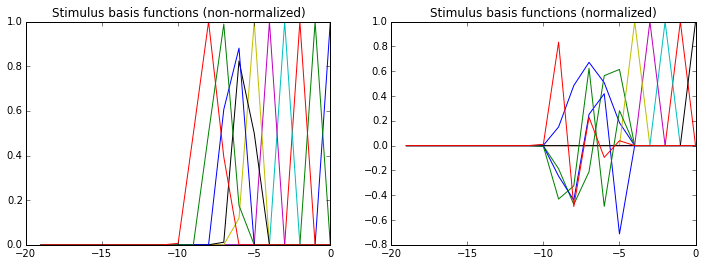

In [471]:
display.display(w_stimFilter)

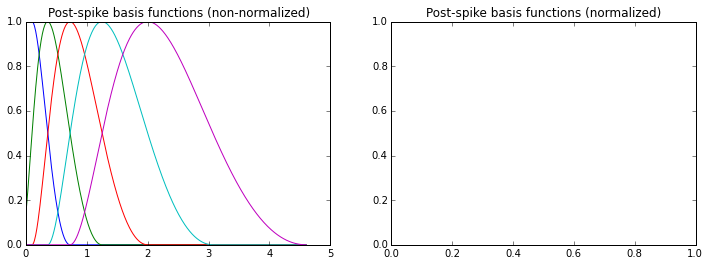

In [472]:
display.display(w_postSpikeFilter)

In [474]:
# saving the parameters form the interactive sessions

if bool(w_stimFilter.kwargs):
    pars_k['n'] = w_stimFilter.kwargs['n']
    pars_k['b'] = w_stimFilter.kwargs['b']
    K,K_orth,kt_domain = filters.createStimulusBasis(pars_k, nkt = 20)

if bool(w_postSpikeFilter.kwargs):
    pars_h['absref'] = w_postSpikeFilter.kwargs['absref']
    pars_h['b'] = w_postSpikeFilter.kwargs['b']
    dt = w_postSpikeFilter.kwargs['dt']
    pars_h['n'] = w_postSpikeFilter.kwargs['n']
    H,H_orth,ht_domain = filters.createPostSpikeBasis(pars_h,dt)

In [475]:
# Note! changing the number of basis functions requires modifying the coefficient variables

In [476]:
# Interpolate Post Spike Filter
MSP = auxfun.makeInterpMatrix(len(ht_domain),1)
MSP[0,0] = 0
H_orth = np.dot(MSP,H_orth)

In [477]:
# creating a H-matrix for each response and merging them in one covariate matrix M_h
M_h_list = []
for tsp in tsp_list:
    tsp = np.array(tsp).astype(np.float)
    M_h_list.append(lk.construct_M_h(tsp,H_orth,dt,Stim))
    

#M_h_list[1] = np.zeros(M_h_list[0].shape)
M_h = np.hstack(tuple(M_h_list))

In [478]:
# combining all covariate matrices
M = np.hstack((M_k,M_h,np.ones((M_h.shape[0],1))))

In [479]:
model = PP.PPModel(M.T,dt = dt/100)

In [480]:
pars0 = np.zeros((M.shape[1],))

In [481]:
res_list = []
for y in y_list:
    print('Initial likelihood is '+str(model.negLogL(pars0,y)))
    res_list.append(model.fit(y,start_coef = pars0, maxiter = 500, method = 'L-BFGS-B'))

25.0
Initial likelihood is 25.0
25.0
-1352.48419002
256947655.078
1122.37323664
-1834.82317094
1112.72740665
-2039.09479925
-2143.28653685
-2197.09474849
-2223.68182453
-2282.99861423
-2326.02039334
-2401.35511544
-2430.00988261
-2444.22890712
-2447.74039906
-2449.82588641
-2459.5251771
-2463.62317563
-2469.1482605
-2484.40938763
-2508.91386347
-2564.3581434
-2620.98467725
-2691.652788
-2730.24419393
-2755.4787176
-2776.97838752
-2811.42405108
-2860.24893112
-2910.9207781
-2967.97829228
-3048.98740374
-3134.29844365
-3153.91015133
-3177.57768675
-3179.56709197
-3180.41103134
-3181.49334022
-3182.04119448
-3182.334067
-3182.70023902
-3183.12989422
-3183.81595646
-3185.61802948
-3188.2295988
-3195.30215736
-3204.12016752
-3213.54633884
-3218.94305074
-3225.10981141
-3235.5570245
-3245.72963125
-3232.94114075
-3252.18491816
-3262.27916527
-3264.63037213
-3265.95468867
-3267.67936662
-3269.31965733
-3269.54868462
-3270.64065056
-3270.91966973
-3271.13255986
-3271.16338861
-3271.19468743
-3

/Users/val/MEGAsync/GLM_PythonModules/notebooks/../code/PoissonProcessClasses.py:171: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if start_coef==None:
/Users/val/anaconda/lib/python3.4/site-packages/scipy/optimize/_minimize.py:362: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  RuntimeWarning)
/Users/val/MEGAsync/GLM_PythonModules/notebooks/../code/PoissonProcessClasses.py:173: OptimizeWarning: Unknown solver options: maxfev
  res = optimize.minimize(self.negLogL,start_coef,jac = self.gradNegLogL,hess = self.hessNegLogL, args = y, options = opts, method = method)


In [482]:
res_list

[     nit: 396
     fun: -3281.4560604222352
     jac: array([ 0.013762  ,  0.00841912,  0.01726661,  0.04156238,  0.03421392,
       -0.01963753,  0.02240561, -0.08406197, -0.00463134,  0.00252968,
       -0.05467664,  0.02358913,  0.02379037,  0.01440381, -0.0290771 ,
       -0.0095068 ])
    nfev: 431
 success: True
 message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
       x: array([  4.68628945e-02,   2.84012639e-01,   9.09050867e-01,
         1.28481712e+00,   8.91207618e-01,   4.75159606e-01,
        -1.01005134e+00,   1.64525336e-01,   1.53358791e-02,
        -1.00059380e-01,  -1.59646671e+01,   4.86738601e+01,
        -8.05394010e+01,  -2.13314620e+01,  -6.45094438e+00,
         2.85554088e+00])
  status: 0]

In [483]:
k_coeff = coeff_k
h_coeff = coeff_h


10
Estimated dc for neuron 0: 2.85554088177


ValueError: x and y must have same first dimension

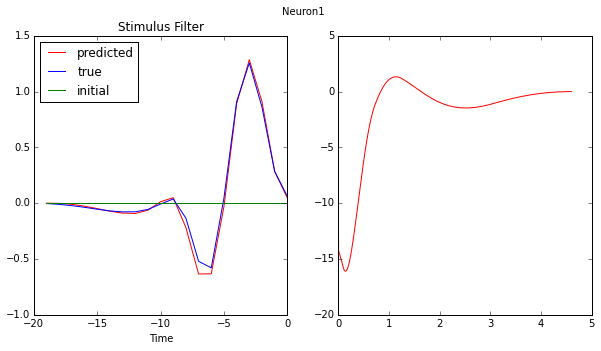

In [484]:
nofCells = N
m = K.shape[1]
print(m)
for i in range(len(res_list)):
    k_coeff_predicted = res_list[i].x[:m]
    h_coeff_predicted = np.reshape(res_list[i].x[m:-1],(H.shape[1],nofCells),order = 'F')
    print('Estimated dc for neuron '+str(i)+': '+str(res_list[i].x[-1]))
    fig,axs = plt.subplots(1,2,figsize = (10,5))
    fig.suptitle('Neuron%d'%(i+1))
    axs[0].plot(-kt_domain[::-1],np.dot(K,k_coeff_predicted),'r',label = 'predicted')
    axs[0].set_title('Stimulus Filter')
    axs[0].hold(True)
    axs[0].plot(-kt_domain[::-1],np.dot(K_true,k_coeff),'b',label = 'true')
    axs[0].plot(-kt_domain[::-1],np.dot(K,pars0[:m]),'g',label = 'initial')
    axs[0].set_xlabel('Time')
    axs[0].legend(loc = 'upper left')
    axs[1].plot(ht_domain,np.dot(H_orth,h_coeff_predicted),'r',label = 'predicted')
    axs[1].plot(ht_domain,np.dot(H_true,h_coeff),'b',label = 'true')
    axs[1].plot(ht_domain,np.dot(H_orth,pars0[m+i*5:m+(i+1)*5]),'g',label = 'initial')
    axs[1].set_title('Post-Spike Filter')
    axs[1].set_xlabel('Time')
    axs[1].legend(loc = 'upper right')

In [ ]:
# Add an interactive way to change the bases

In [ ]:
# Add an easy way to change the coefficients: sample from some distribution